# Predicting house pricing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df=df.drop(['id','date'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [6]:
df=df.drop_duplicates(keep='first')

In [7]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.shape

(21608, 19)

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.400984e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.671646e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


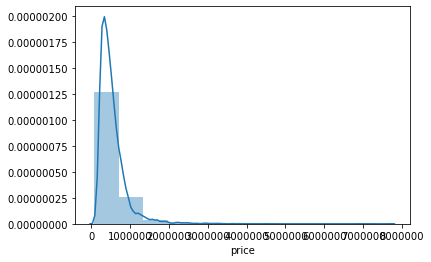

In [10]:
sns.distplot(df['price'],bins=12)

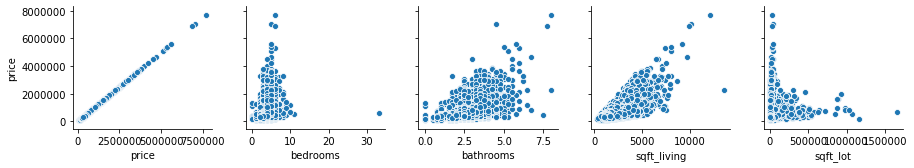

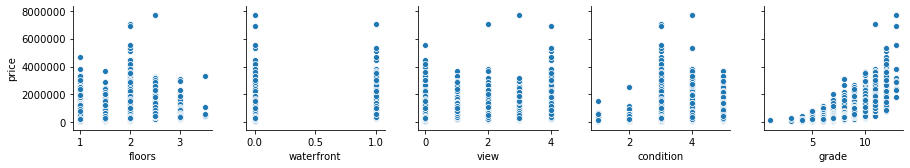

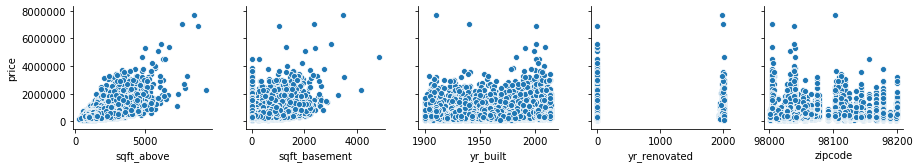

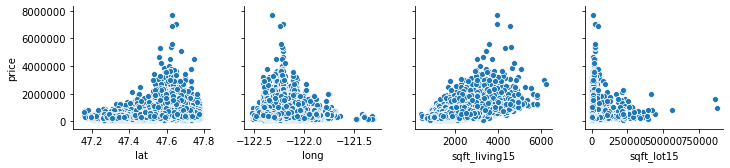

In [11]:
df_nums=df.select_dtypes(include=['float64','int64'])
for i in range(0,len(df_nums.columns),5):
    sns.pairplot(df_nums,y_vars=['price'],x_vars=df_nums.columns[i:i+5])

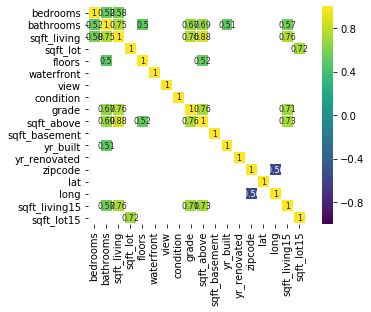

In [12]:
corr=df_nums.drop('price',axis=1).corr()
sns.heatmap(corr[(corr>=0.5 )|(corr <= -0.4)],
           cmap='viridis',
           vmax=1.0,
           vmin=-1.0,
           linewidth=0.1,annot=True ,annot_kws={"size":8},square=True);

In [13]:
corrs = df.corr()[['price']]
corrs.loc[(corrs['price']>=0.5) |(corrs['price']<=(-.5))]

,price
price,1.000000
bathrooms,0.525146
sqft_living,0.702035
grade,0.667541
sqft_above,0.605559
sqft_living15,0.585378


In [14]:
X = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
X.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800


In [15]:
Y = df['price']

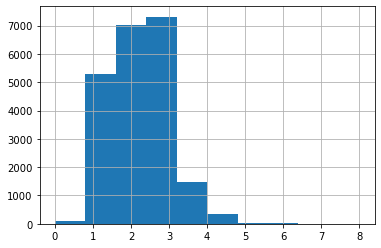

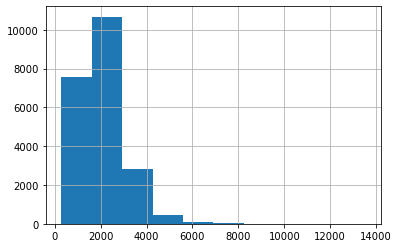

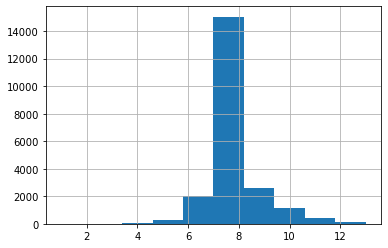

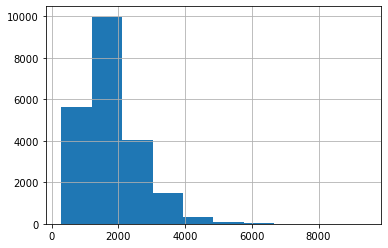

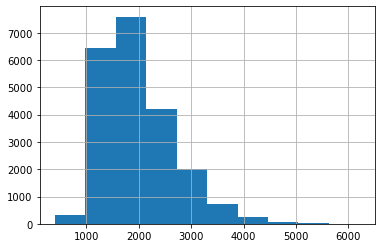

In [16]:
for i in range(X.shape[1]):
    X.iloc[:, i].hist()
    print()
    plt.show()

### first trial with min-max scaler

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
print(x_train.max()) 
print()
print(x_train.min())
print()
print(x_train.mean())

bathrooms            8.0
sqft_living      12050.0
grade               13.0
sqft_above        8570.0
sqft_living15     6210.0
dtype: float64

bathrooms          0.0
sqft_living      370.0
grade              3.0
sqft_above       370.0
sqft_living15    399.0
dtype: float64

bathrooms           2.115702
sqft_living      2076.598149
grade               7.653223
sqft_above       1783.175934
sqft_living15    1983.802909
dtype: float64


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(mean_squared_error(y_train, model.predict(x_train)))
model.score(x_train, y_train)

61073866234.19486


0.5476176342700337

In [22]:
x_test = scaler.transform(x_test)
print(mean_squared_error(y_test, model.predict(x_test)))
model.score(x_test, y_test)

1475172835892.5525


-9.98200463383211

### try with standard scaler

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=0)

In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(mean_squared_error(y_train, model.predict(x_train)))
model.score(x_train, y_train)

61073866234.19486


0.5476176342700337

In [27]:
print(mean_squared_error(y_test, model.predict(x_test)))
model.score(x_test, y_test)

62321674677.505005


0.5360428937925561

### Try with all features

In [37]:
# first split your dependant and independant variables
training_data = df.drop('price', axis=1)
goal_data = df.iloc[:, 0].values


In [38]:
# split train and test sets
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(training_data, goal_data, test_size=0.2, random_state = 0)

In [39]:
training_data


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_set,goal_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
goal_predict = model.predict(test_set)

In [42]:
print(mean_squared_error(goal_train, model.predict(train_set)))
model.score(train_set, goal_train)

41149658985.16634


0.7020904090508313

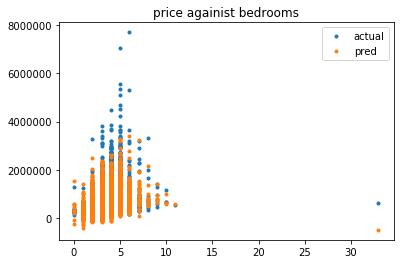

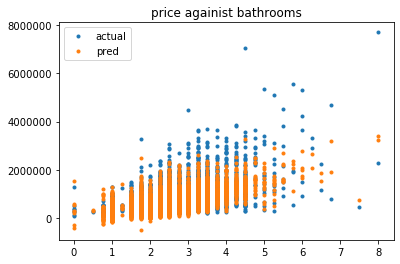

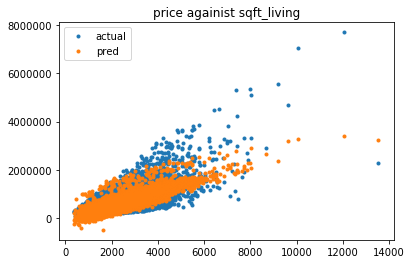

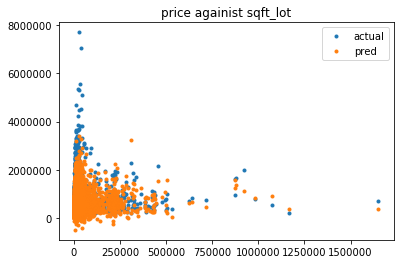

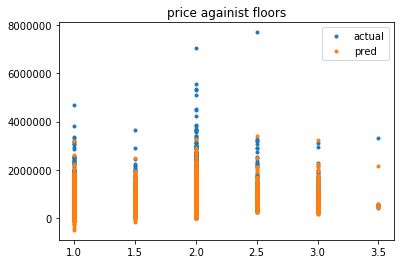

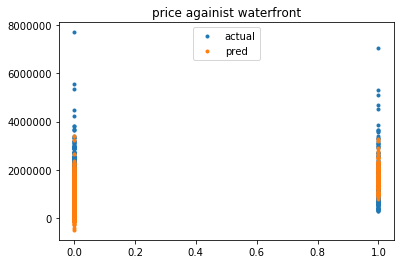

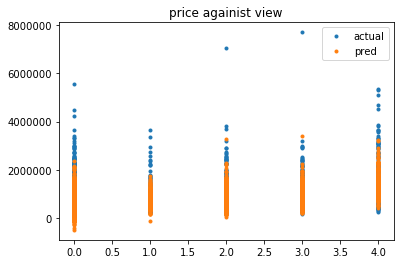

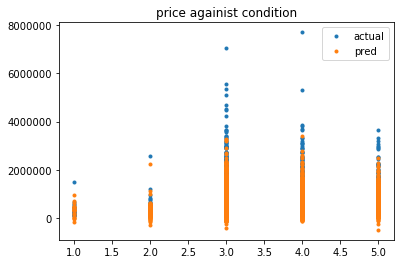

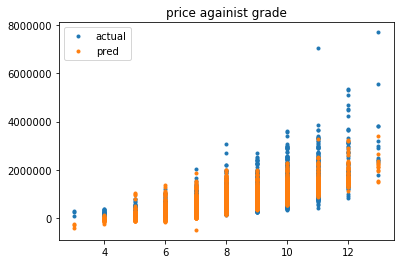

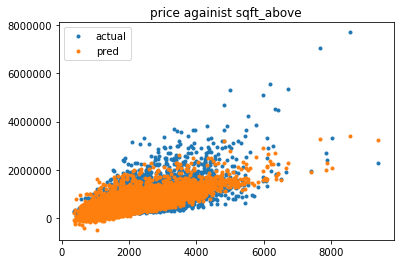

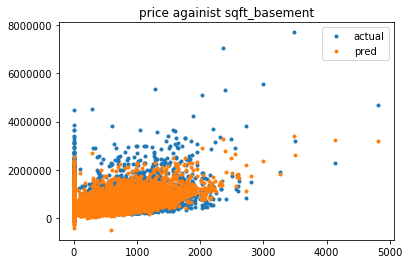

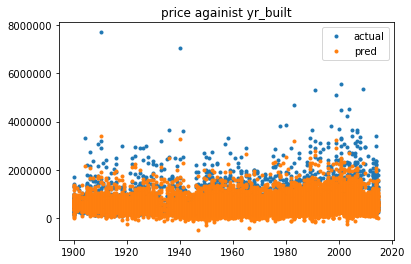

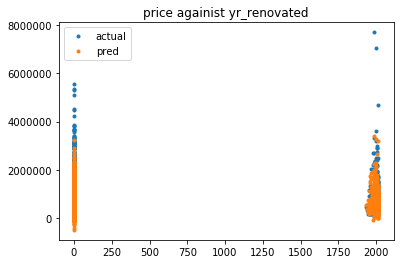

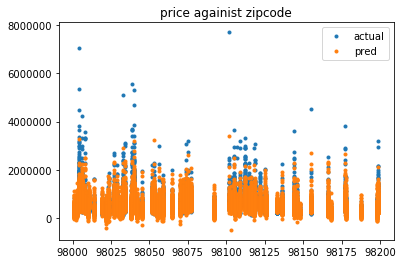

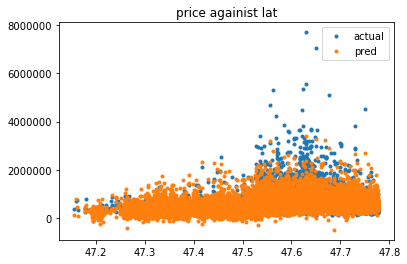

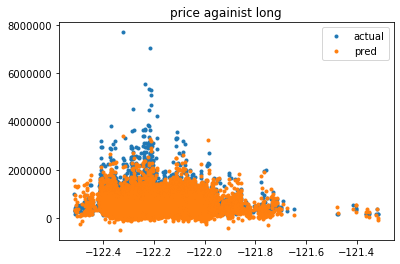

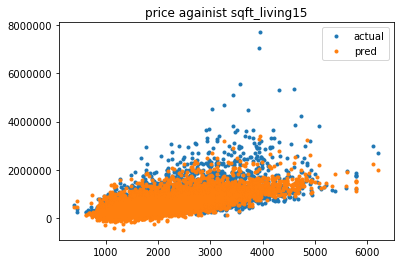

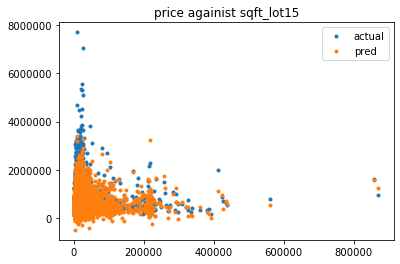

In [43]:
for col in train_set:
    y_pred = model.predict(train_set)
    plt.plot(train_set.loc[:, col], goal_train, '.', label='actual')
    plt.plot(train_set.loc[:, col], y_pred, '.', label='pred')
    plt.legend()
    plt.title(f"price againist {col}")
    plt.show()

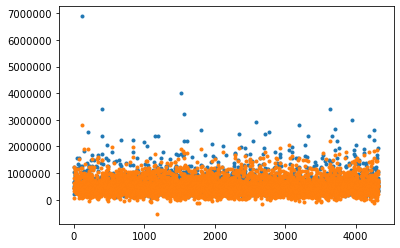

In [20]:
plt.plot(goal_test, '.', goal_predict, '.')
plt.show()